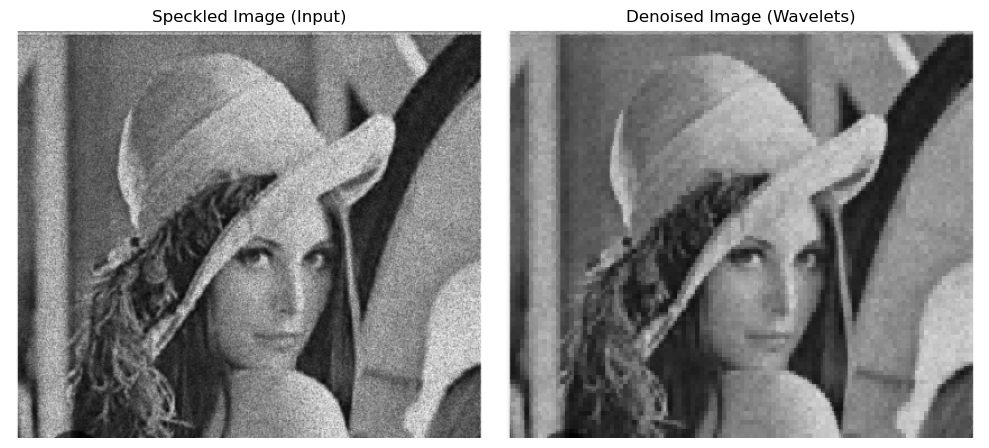

In [4]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Wavelet-based denoising function
def wavelet_denoise(image, wavelet='db1', level=2):
    # Perform multi-level wavelet decomposition
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # Thresholding
    threshold = np.sqrt(2 * np.log(image.size)) * np.median(np.abs(coeffs[-1][-1])) / 0.6745
    def soft_threshold(coeff):
        return pywt.threshold(coeff, threshold, mode='soft')
    
    # Apply thresholding to each coefficient
    denoised_coeffs = [coeffs[0]] + [tuple(soft_threshold(c) for c in details) for details in coeffs[1:]]
    
    # Reconstruct the denoised image
    denoised_image = pywt.waverec2(denoised_coeffs, wavelet)
    return np.clip(denoised_image, 0, 1)

# Load the speckled image as input (normalized to range [0, 1])
image_path = r"C:\Users\NIRUPAMA\OneDrive - Amrita Vishwa Vidyapeetham\Documents\8th sem\wavlets and applications\speckled c.png"
speckled_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if speckled_image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")
speckled_image = speckled_image / 255.0  # Normalize the image

# Perform wavelet denoising
denoised_image = wavelet_denoise(speckled_image, wavelet='db1', level=2)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Speckled Image (Input)")
plt.imshow(speckled_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Denoised Image (Wavelets)")
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()